### Advanced Python Training at ZeOmega - Day 5

Feb 07-11, 2022<br>
09:30 AM - 01:00 PM

[Anand Chitipothu](https://pipal.in/trainers/anand)

These notes are available online at https://bit.ly/zeomega-py22

© Pipal Academy LLP

[Home](.) | [Day 1](day1.html) | [Day 2](day2.html) | [Day 3](day3.html) | [Day 4](day4.html) | **Day 5**

[Download this notebook](day5.ipynb)

## Topics

* Working with APIs
* SQLAlchemy

## Working with Web & APIs

In [1]:
from urllib.request import urlopen

In [2]:
url = "https://anandology.com/tmp/hello.txt"

In [4]:
urlopen(url).read()

b'Hello, world!\n'

In [5]:
urlopen(url).read().decode('utf-8')

'Hello, world!\n'

In [6]:
response = urlopen(url)

In [7]:
response

In [8]:
print(response.status)

200


In [9]:
print(response.headers)

Server: nginx/1.10.3 (Ubuntu)
Date: Fri, 11 Feb 2022 04:11:29 GMT
Content-Type: text/plain
Content-Length: 14
Last-Modified: Sat, 30 Nov 2019 10:26:32 GMT
Connection: close
ETag: "5de243d8-e"
Access-Control-Allow-Origin: *
Accept-Ranges: bytes




In [10]:
!curl https://anandology.com/tmp/hello.txt

Hello, world!


In [11]:
!curl -i https://anandology.com/tmp/hello.txt












Hello, world!


### The `requests` Module

There is a very popular third-party library called `requests` for handling HTTP requests. 

To install it, use:
    
```
$ pip install requests
```

This is already installed in your lab. You don't need to do this.

In [12]:
import requests

In [13]:
url = "https://anandology.com/tmp/hello.txt"

In [14]:
response = requests.get(url)

In [15]:
response.status_code

200

In [16]:
response.headers

{'Server': 'nginx/1.10.3 (Ubuntu)', 'Date': 'Fri, 11 Feb 2022 04:17:18 GMT', 'Content-Type': 'text/plain', 'Content-Length': '14', 'Last-Modified': 'Sat, 30 Nov 2019 10:26:32 GMT', 'Connection': 'keep-alive', 'ETag': '"5de243d8-e"', 'Access-Control-Allow-Origin': '*', 'Accept-Ranges': 'bytes'}

In [17]:
# read the response as bytes
response.content 

b'Hello, world!\n'

In [18]:
# read the response as text
response.text 

'Hello, world!\n'

**Problem:** Write a program `wget.py` that takes a URL as command-line argument and downloands that into the current directory.

```
$ python wget.py https://anandology.com/tmp/hello.txt
Downloaded to hello.txt

$ python wget.py https://anandology.com/tmp/python.png
Downloaded to python.png
```

In [21]:
!wget https://anandology.com/tmp/python.png

--2022-02-11 09:49:17--  https://anandology.com/tmp/python.png
Resolving anandology.com (anandology.com)... 139.59.87.96
Connecting to anandology.com (anandology.com)|139.59.87.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11155 (11K) [image/png]
Saving to: ‘python.png’

python.png          100%[===================>]  10.89K  --.-KB/s    in 0s      

2022-02-11 09:49:17 (70.9 MB/s) - ‘python.png’ saved [11155/11155]



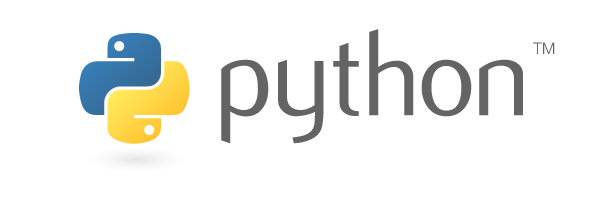

In [22]:
from IPython.display import Image
Image(filename='python.png')

In [23]:
url = "https://anandology.com/tmp/hello.txt"

In [24]:
url.split("/")

['https:', '', 'anandology.com', 'tmp', 'hello.txt']

In [25]:
url.split("/")[-1]

'hello.txt'

In [26]:
url = "https://anandology.com/tmp/python.png"

In [30]:
# this doesn't work because the image is not text
text = requests.get(url).text
with open("python.png", "w") as f:
    f.write(text)

In [31]:
Image(filename='python.png')

In [32]:
!ls -l python.png

-rw-r--r--  1 anand  staff  20265 Feb 11 10:23 python.png


In [35]:
!wget -nv https://anandology.com/tmp/python.png -O py.png

2022-02-11 10:24:26 URL:https://anandology.com/tmp/python.png [11155/11155] -> "py.png" [1]


In [36]:
!ls -l *.png

-rw-r--r--  1 anand  staff  11155 Dec  7 21:47 py.png
-rw-r--r--  1 anand  staff  20265 Feb 11 10:23 python.png


In [37]:
data = requests.get(url).content
with open("python.png", "wb") as f:
    f.write(data)

In [38]:
!ls -l *.png

-rw-r--r--  1 anand  staff  11155 Dec  7 21:47 py.png
-rw-r--r--  1 anand  staff  11155 Feb 11 10:25 python.png


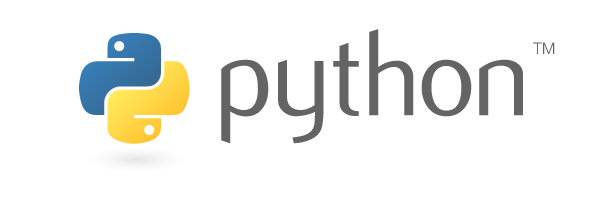

In [39]:
Image(filename='python.png')

## Working with APIs

### JSON

In [44]:
training = {
    "title": "Advanced Python Training",
    'num_participants': 38,
    "online": True,
    "participants": [
        {"name": "Alice", "email": "alice@example.com"},
        {"name": "Bob", "email": "bob@example.com"},        
    ]
}

In [45]:
import json

In [46]:
print(json.dumps(training, indent=True))

{
 "title": "Advanced Python Training",
 "num_participants": 38,
 "online": true,
 "participants": [
  {
   "name": "Alice",
   "email": "alice@example.com"
  },
  {
   "name": "Bob",
   "email": "bob@example.com"
  }
 ]
}


In [47]:
jsontext = json.dumps(training)

In [48]:
jsontext

'{"title": "Advanced Python Training", "num_participants": 38, "online": true, "participants": [{"name": "Alice", "email": "alice@example.com"}, {"name": "Bob", "email": "bob@example.com"}]}'

In [49]:
t = json.loads(jsontext)

In [50]:
t

{'title': 'Advanced Python Training',
 'num_participants': 38,
 'online': True,
 'participants': [{'name': 'Alice', 'email': 'alice@example.com'},
  {'name': 'Bob', 'email': 'bob@example.com'}]}

In [51]:
t == training

True

### Working with APIs

#### Example: Find popular repositories on github

Github has very beautiful API.

https://developer.github.com/

In [52]:
import requests

url = "https://api.github.com/search/repositories"

params = {
    "q": "language:python",
    "sort": "star",
    "order": "desc"
}

In [65]:
d = requests.get(url, params=params).json()

In [66]:
type(d)

dict

In [67]:
d.keys()

dict_keys(['total_count', 'incomplete_results', 'items'])

In [68]:
d['total_count']

8359020

In [70]:
d['items'][0].keys()

dict_keys(['id', 'node_id', 'name', 'full_name', 'private', 'owner', 'html_url', 'description', 'fork', 'url', 'forks_url', 'keys_url', 'collaborators_url', 'teams_url', 'hooks_url', 'issue_events_url', 'events_url', 'assignees_url', 'branches_url', 'tags_url', 'blobs_url', 'git_tags_url', 'git_refs_url', 'trees_url', 'statuses_url', 'languages_url', 'stargazers_url', 'contributors_url', 'subscribers_url', 'subscription_url', 'commits_url', 'git_commits_url', 'comments_url', 'issue_comment_url', 'contents_url', 'compare_url', 'merges_url', 'archive_url', 'downloads_url', 'issues_url', 'pulls_url', 'milestones_url', 'notifications_url', 'labels_url', 'releases_url', 'deployments_url', 'created_at', 'updated_at', 'pushed_at', 'git_url', 'ssh_url', 'clone_url', 'svn_url', 'homepage', 'size', 'stargazers_count', 'watchers_count', 'language', 'has_issues', 'has_projects', 'has_downloads', 'has_wiki', 'has_pages', 'forks_count', 'mirror_url', 'archived', 'disabled', 'open_issues_count', 'lic

In [71]:
repo = d['items'][0]

In [72]:
keys = ['name', 'full_name', 'description', 'forks_count', 'stargazers_count', 'size']

repo = {k: v for k, v in repo.items() if k in keys}

In [73]:
repo

{'name': 'public-apis',
 'full_name': 'public-apis/public-apis',
 'description': 'A collective list of free APIs',
 'size': 5159,
 'stargazers_count': 179803,
 'forks_count': 20715}

In [81]:
for repo in d['items']:
    print(f"{repo['full_name']} {repo['forks_count']} {repo['stargazers_count']}")
    print(f"{repo['description'][:100]}")
    print("---")

public-apis/public-apis 20715 179803
A collective list of free APIs
---
donnemartin/system-design-primer 29957 161805
Learn how to design large-scale systems. Prep for the system design interview.  Includes Anki flashc
---
tensorflow/models 45451 72733
Models and examples built with TensorFlow
---
nvbn/thefuck 3067 66703
Magnificent app which corrects your previous console command.
---
pallets/flask 14841 57900
The Python micro framework for building web applications.
---
josephmisiti/awesome-machine-learning 13070 53147
A curated list of awesome Machine Learning frameworks, libraries and software.
---
home-assistant/core 17091 49765
:house_with_garden: Open source home automation that puts local control and privacy first.
---
scikit-learn/scikit-learn 22610 48987
scikit-learn: machine learning in Python
---
soimort/you-get 8762 43083
:arrow_double_down: Dumb downloader that scrapes the web
---
ageitgey/face_recognition 11978 43075
The world's simplest facial recognition api for Python

#### Example: count repos per language

In [82]:
def count_repos(language):
    url = "https://api.github.com/search/repositories"
    params = {
        "q": f"language:{language}",
        "sort": "star",
        "order": "desc"
    }
    d = requests.get(url, params=params).json()
    return d['total_count']

In [83]:
languages = ['python', 'javascript', 'java', 'rust']

In [84]:
for lang in languages:
    print(lang, count_repos(lang))

python 8430154
javascript 15953354
java 10686332
rust 290865


## SQLAlchemy

It is a query builder and an ORM. 

First, let's see how to work with databases without using SQLAlchemy.

We are using to use a sqlite database for this.

In [85]:
!ls *.db

trains.db


###  working with sqlite

In [86]:
import sqlite3

In [87]:
conn = sqlite3.connect("trains.db")

In [88]:
cursor = conn.cursor()

In [91]:
cursor.execute("select number, name, from_station_code, to_station_code from train limit 5")

In [92]:
cursor.fetchall()

[('04601', 'Jammu Tawi Udhampur Special', 'JAT', 'UHP'),
 ('04602', 'UDHAMPUR JAMMUTAWI DMU', 'UHP', 'JAT'),
 ('04603', 'JAT UDAHMPUR DMU', 'JAT', 'UHP'),
 ('04604', 'UDHAMPUR JAMMUTAWI DMU', 'UHP', 'JAT'),
 ('04728', 'Mumbai BandraT-Bikaner SF Special', 'BDTS', 'BKN')]

In [93]:
cursor.close()
conn.close()

### Introduction to SQLAlchemy

In [94]:
from sqlalchemy import create_engine

In [96]:
# created an engine with database url as input
engine = create_engine("sqlite:///trains.db")

We can work with raw queries using the engine as follows.

But usually, we don't run raw queries. We construct a query using sqlalchemy expressions.

In [100]:
with engine.connect() as conn:
    result = conn.execute("select 1")
    print(result.all())

[(1,)]


In [99]:
q = """
    select 
        number, 
        name, 
        from_station_code, 
        to_station_code 
    from train 
    limit 5
    """
with engine.connect() as conn:
    result = conn.execute(q)
#     print(result.all()) # read all rows
    for row in result:
        print(row)

('04601', 'Jammu Tawi Udhampur Special', 'JAT', 'UHP')
('04602', 'UDHAMPUR JAMMUTAWI DMU', 'UHP', 'JAT')
('04603', 'JAT UDAHMPUR DMU', 'JAT', 'UHP')
('04604', 'UDHAMPUR JAMMUTAWI DMU', 'UHP', 'JAT')
('04728', 'Mumbai BandraT-Bikaner SF Special', 'BDTS', 'BKN')


In [103]:
with engine.connect() as conn:
    result = conn.execute(q)
#     print(result.all()) # read all rows
    print(result.keys())
    for row in result:
        print(row)


RMKeyView(['number', 'name', 'from_station_code', 'to_station_code'])
('04601', 'Jammu Tawi Udhampur Special', 'JAT', 'UHP')
('04602', 'UDHAMPUR JAMMUTAWI DMU', 'UHP', 'JAT')
('04603', 'JAT UDAHMPUR DMU', 'JAT', 'UHP')
('04604', 'UDHAMPUR JAMMUTAWI DMU', 'UHP', 'JAT')
('04728', 'Mumbai BandraT-Bikaner SF Special', 'BDTS', 'BKN')


In [105]:
with engine.connect() as conn:
    result = conn.execute(q)
#     print(result.all()) # read all rows
    print(result.keys())
    for row in result:
        print(f"{row.number} ({row.name}): {row.from_station_code} -> {row.to_station_code}")


RMKeyView(['number', 'name', 'from_station_code', 'to_station_code'])
04601 (Jammu Tawi Udhampur Special): JAT -> UHP
04602 (UDHAMPUR JAMMUTAWI DMU): UHP -> JAT
04603 (JAT UDAHMPUR DMU): JAT -> UHP
04604 (UDHAMPUR JAMMUTAWI DMU): UHP -> JAT
04728 (Mumbai BandraT-Bikaner SF Special): BDTS -> BKN


In [119]:
q = """
SELECT name FROM sqlite_master
WHERE type='table'
ORDER BY name
"""
with engine.connect() as conn:
    result = conn.execute(q)
    for row in result:
        print(row.name)

station
train


### Working with Database Metadata

In [110]:
from sqlalchemy import create_engine
from sqlalchemy import MetaData, Table

In [107]:
engine = create_engine("sqlite:///trains.db")

In [108]:
metadata = MetaData(bind=engine)

In [111]:
train_table = Table('train', metadata, autoload=True)
station_table = Table('station', metadata, autoload=True)

In [115]:
for c in train_table.columns:
    print(c)

train.number
train.name
train.type
train.zone
train.from_station_code
train.from_station_name
train.to_station_code
train.to_station_name
train.departure
train.arrival
train.duration_h
train.duration_m
train.distance
train.return_train
train.sleeper
train.third_ac
train.second_ac
train.first_ac
train.first_class
train.chair_car


In [120]:
for c in station_table.columns:
    print(c)

station.code
station.name
station.zone
station.state
station.address
station.latitude
station.longitude


**Show 5 trains**

In [121]:
from sqlalchemy import select

In [122]:
t = train_table

q = select(
        t.c.number,
        t.c.name,
        t.c.from_station_code,
        t.c.to_station_code
    ).limit(5)
print(q)

SELECT train.number, train.name, train.from_station_code, train.to_station_code 
FROM train
 LIMIT ? OFFSET ?


In [123]:
trains = q.execute()
for train in trains:
    print(train)

('04601', 'Jammu Tawi Udhampur Special', 'JAT', 'UHP')
('04602', 'UDHAMPUR JAMMUTAWI DMU', 'UHP', 'JAT')
('04603', 'JAT UDAHMPUR DMU', 'JAT', 'UHP')
('04604', 'UDHAMPUR JAMMUTAWI DMU', 'UHP', 'JAT')
('04728', 'Mumbai BandraT-Bikaner SF Special', 'BDTS', 'BKN')


**Problem:** List 5 stations

In [124]:
import sqlalchemy
sqlalchemy.__version__

'1.4.31'

**List all trains starting from bangalore to chennai**

In [129]:
t = train_table

q = (select(
        t.c.number,
        t.c.name,
        t.c.from_station_code,
        t.c.to_station_code)
     .where(
         t.c.from_station_code == 'SBC', 
         t.c.to_station_code == 'MAS'))     
print(q)

SELECT train.number, train.name, train.from_station_code, train.to_station_code 
FROM train 
WHERE train.from_station_code = ? AND train.to_station_code = ?


In [130]:
trains = q.execute()
for train in trains:
    print(train)

('12028', 'BANGALORE CITY - CHENNAI CENT Shatabdi Exp', 'SBC', 'MAS')
('12608', 'BANGALORE - CHENNAI CENTRAL Lalbagh Exp', 'SBC', 'MAS')
('12640', 'BANGALORE - CHENNAI CENT Brindavan Exp', 'SBC', 'MAS')
('12658', 'BANGALORE - CHENNAI Mail', 'SBC', 'MAS')
('12610', 'BANGALORE - CHENNAI CENT SF Intercity Exp', 'SBC', 'MAS')


**Problem:** List 10 stations in Karnataka.

In [131]:
q = station_table.select().limit(5)
print(q)

SELECT station.code, station.name, station.zone, station.state, station.address, station.latitude, station.longitude 
FROM station
 LIMIT ? OFFSET ?


In [132]:
result = q.execute()
for row in result:
    print(row)

('BDHL', 'Badhal', 'NWR', 'Rajasthan', 'Kishangarh Renwal, Rajasthan', 75.4516454, 27.2520587)
('KHH', 'KICHHA', 'NER', 'Uttar Pradesh', 'Kichha, Uttar Pradesh', 79.519746, 28.913427)
('SRKN', 'Sherekan', 'NWR', 'Rajasthan', 'MDR 89, Rajasthan', 74.43499088287354, 29.55519806064484)
('BKKA', 'Bhukarka', 'NWR', 'Rajasthan', 'Bhukarka, Rajasthan', 74.75103096105158, 29.238227312503696)
('NHR', 'Nohar', 'NWR', 'Rajasthan', 'State Highway 36, Rajasthan', 74.77362781763077, 29.192562738768984)


### Using count function

In [133]:
from sqlalchemy import func

**How many trains are there?**

In [134]:
t = train_table

q = select(func.count(t.c.number))
print(q)

SELECT count(train.number) AS count_1 
FROM train


In [135]:
result = q.execute()
for row in result:
    print(row)

(5208,)


In [136]:
q = select(
        func.count(t.c.number).label('count'))
print(q)

SELECT count(train.number) AS count 
FROM train


In [138]:
q.execute().first()

(5208,)

In [139]:
q.execute().first().count

5208

**How many trains are stating from Bangalore?**

In [140]:
q = (select(
        func.count(t.c.number).label('count'))
     .where(t.c.from_station_code == 'SBC'))
print(q)

SELECT count(train.number) AS count 
FROM train 
WHERE train.from_station_code = ?


In [141]:
q.execute().first().count

57

**Problem:** How many stations are there in Karnataka?

**What the are the trains covering longest distance?**

In [148]:
t = train_table

q = (select(
        t.c.number,
        t.c.name,
        t.c.from_station_code,
        t.c.to_station_code,
        t.c.distance)
     .where(t.c.distance != '')
     .order_by(t.c.distance.desc())
     .limit(10))     
print(q)

SELECT train.number, train.name, train.from_station_code, train.to_station_code, train.distance 
FROM train 
WHERE train.distance != ? ORDER BY train.distance DESC
 LIMIT ? OFFSET ?


In [149]:
result = q.execute()
for row in result:
    print(row)

('15905', 'KANNIYAKUMARI - DIBRUGARH Vivek Exp', 'CAPE', 'DBRG', 4279.0)
('15906', 'DIBRUGARH - KANNIYAKUMARI Vivek Exp', 'DBRG', 'CAPE', 4278.0)
('16317', 'Himsagar Express', 'CAPE', 'JAT', 3715.0)
('16318', 'Himsagar Express', 'JAT', 'CAPE', 3715.0)
('16687', 'Navyug Express', 'MAQ', 'JAT', 3609.0)
('16688', 'Navyug Express', 'JAT', 'MAQ', 3609.0)
('16688-Slip', 'Navyug Express Slip', 'JAT', 'TEN', 3601.0)
('12484', 'AMRITSAR - KOCHUVELI SF Exp', 'ASR', 'KCVL', 3597.0)
('12483', 'KOCHUVELI - AMRITSAR SF Exp', 'KCVL', 'ASR', 3597.0)
('15902', 'DIBRUGARH - BENGALURU CITY Weekly Exp', 'DBRG', 'SBC', 3578.0)


**What the are the trains that has the longest journey?**

In [154]:
t = train_table

q = (select(
        t.c.number,
        t.c.name,
        t.c.from_station_code,
        t.c.to_station_code,
        t.c.duration_h,
        t.c.duration_m)
     .where(t.c.duration_h != '')
     .order_by(t.c.duration_h.desc(), t.c.duration_m.desc())
     .limit(10))     
print(q)

SELECT train.number, train.name, train.from_station_code, train.to_station_code, train.duration_h, train.duration_m 
FROM train 
WHERE train.duration_h != ? ORDER BY train.duration_h DESC, train.duration_m DESC
 LIMIT ? OFFSET ?


In [155]:
result = q.execute()
for row in result:
    print(row)

('15905', 'KANNIYAKUMARI - DIBRUGARH Vivek Exp', 'CAPE', 'DBRG', 85.0, 30.0)
('15906', 'DIBRUGARH - KANNIYAKUMARI Vivek Exp', 'DBRG', 'CAPE', 82.0, 40.0)
('16317', 'Himsagar Express', 'CAPE', 'JAT', 71.0, 10.0)
('16318', 'Himsagar Express', 'JAT', 'CAPE', 70.0, 15.0)
('16787', 'TIRUNELVELI - KATRA Exp', 'TEN', 'SVDK', 69.0, 25.0)
('15930', 'DIBRUGARH - CHENNAI EGMORE Weekly Exp', 'DBRG', 'MS', 68.0, 30.0)
('15901', 'BENGALURU - NEW TINSUKIA Weekly Exp', 'SBC', 'NTSK', 68.0, 15.0)
('16687', 'Navyug Express', 'MAQ', 'JAT', 68.0, 5.0)
('15635', 'OKHA - GUWAHATI EXP', 'OKHA', 'GHY', 67.0, 40.0)
('15929', 'CHENNAI EGMORE - DIBRUGARH Weekly Exp', 'MS', 'DBRG', 67.0, 30.0)


**Which stations have the most number of trains starting from there?**

In [164]:
from sqlalchemy import desc

t = train_table

q = (select(
        t.c.from_station_code,
        t.c.from_station_name,
        func.count().label('count'))
     .group_by(t.c.from_station_code, t.c.from_station_name)
#      .order_by(func.count().desc())
     .order_by(desc('count'))
     .limit(10))     
print(q)

SELECT train.from_station_code, train.from_station_name, count(*) AS count 
FROM train GROUP BY train.from_station_code, train.from_station_name ORDER BY count DESC
 LIMIT ? OFFSET ?


In [165]:
result = q.execute()
for row in result:
    print(row)

('HWH', 'HOWRAH JN', 136)
('MSB', 'CHENNAI BEACH', 122)
('NDLS', 'NEW DELHI', 80)
('DLI', 'OLD DELHI', 70)
('MAS', 'CHENNAI CENTRAL', 68)
('SBC', 'BANGALORE CITY JN', 57)
('ADI', 'AHMEDABAD JN', 55)
('LPI', 'LINGAMPALLI', 54)
('HYB', 'HYDERABAD DECCAN', 53)
('NZM', 'DELHI H NIZAMUDDIN', 51)


**Problem:** Which states have the most number of railway stations?

**How many trains are starting from karnataka?**

In [168]:
t = train_table
s = station_table

q = (select(
        s.c.state,
        func.count().label('count'))
     .where(t.c.from_station_code==s.c.code, s.c.state=='Karnataka'))     
print(q)

SELECT station.state, count(*) AS count 
FROM station, train 
WHERE train.from_station_code = station.code AND station.state = ?


In [169]:
q.execute().first()

('Karnataka', 201)

**Which states have the most number of traing starting from there?**

In [172]:
t = train_table
s = station_table

q = (select(
        s.c.state,
        func.count().label('count'))
     .where(t.c.from_station_code==s.c.code)
     .group_by(s.c.state)
     .order_by(desc('count'))
     .limit(10))
print(q)

SELECT station.state, count(*) AS count 
FROM station, train 
WHERE train.from_station_code = station.code GROUP BY station.state ORDER BY count DESC
 LIMIT ? OFFSET ?


In [173]:
result = q.execute()
for row in result:
    print(row)

('', 3124)
('Maharashtra', 228)
('Karnataka', 201)
('Gujarat', 179)
('Madhya Pradesh', 163)
('Uttar Pradesh', 151)
('Rajasthan', 125)
('Tamil Nadu', 116)
('Bihar', 110)
('Andhra Pradesh', 110)


**From which state are the longest trains starting from?**

In [177]:
t = train_table
s = station_table

q = (select(
        s.c.state,
        func.count().label('count'))
     .where(
        t.c.from_station_code==s.c.code,
        t.c.distance > 3000)
     .group_by(s.c.state)
     .order_by(desc('count')))
print(q)

SELECT station.state, count(*) AS count 
FROM station, train 
WHERE train.from_station_code = station.code AND train.distance > ? GROUP BY station.state ORDER BY count DESC


In [178]:
result = q.execute()
for row in result:
    print(row)

('', 41)
('Tamil Nadu', 4)
('Jammu and Kashmir', 4)
('Assam', 3)
('Karnataka', 2)
('Gujarat', 2)
('Uttarakhand', 1)
('Chandigarh', 1)


## Feedback

Please take sometime to let me know how you felt about the training.

[View Feedback Form &rarr;](https://forms.gle/1xD1bVJC8Vwe8qQJ9)

## Q & A

How to query for both Bangalore and Mysore?

In [184]:
# trains from bangalore to chennai
t = train_table

q = (select(
        t.c.number,
        t.c.name,
        t.c.from_station_code,
        t.c.to_station_code)
     .where(
         t.c.from_station_code == 'SBC', 
         t.c.to_station_code == 'MAS'))     
print(q)

SELECT train.number, train.name, train.from_station_code, train.to_station_code 
FROM train 
WHERE train.from_station_code = ? AND train.to_station_code = ?


In [183]:
result = q.execute()
for row in result:
    print(row)

('12028', 'BANGALORE CITY - CHENNAI CENT Shatabdi Exp', 'SBC', 'MAS')
('12608', 'BANGALORE - CHENNAI CENTRAL Lalbagh Exp', 'SBC', 'MAS')
('12640', 'BANGALORE - CHENNAI CENT Brindavan Exp', 'SBC', 'MAS')
('12658', 'BANGALORE - CHENNAI Mail', 'SBC', 'MAS')
('12610', 'BANGALORE - CHENNAI CENT SF Intercity Exp', 'SBC', 'MAS')


How to include trains from Yeswantpur as well?

In [187]:
# trains from bangalore to chennai
t = train_table

q = (select(
        t.c.number,
        t.c.name,
        t.c.from_station_code,
        t.c.to_station_code)
     .where(
         t.c.from_station_code.in_(['SBC', 'YPR']),
         t.c.to_station_code == 'MAS'))     
print(q)

SELECT train.number, train.name, train.from_station_code, train.to_station_code 
FROM train 
WHERE train.from_station_code IN (__[POSTCOMPILE_from_station_code_1]) AND train.to_station_code = ?


In [188]:
result = q.execute()
for row in result:
    print(row)

('12028', 'BANGALORE CITY - CHENNAI CENT Shatabdi Exp', 'SBC', 'MAS')
('12291', 'YESVANTPUR - CHENNAI SF Exp', 'YPR', 'MAS')
('12608', 'BANGALORE - CHENNAI CENTRAL Lalbagh Exp', 'SBC', 'MAS')
('12640', 'BANGALORE - CHENNAI CENT Brindavan Exp', 'SBC', 'MAS')
('12658', 'BANGALORE - CHENNAI Mail', 'SBC', 'MAS')
('12610', 'BANGALORE - CHENNAI CENT SF Intercity Exp', 'SBC', 'MAS')


The other way is to use the OR operator.

In [189]:
from sqlalchemy import or_

In [190]:
# trains from bangalore to chennai
t = train_table

q = (select(
        t.c.number,
        t.c.name,
        t.c.from_station_code,
        t.c.to_station_code)
     .where(
         or_(
             t.c.from_station_code == 'SBC', 
             t.c.from_station_code == 'YPR'),
         t.c.to_station_code == 'MAS'))     
print(q)

SELECT train.number, train.name, train.from_station_code, train.to_station_code 
FROM train 
WHERE (train.from_station_code = ? OR train.from_station_code = ?) AND train.to_station_code = ?


In [191]:
result = q.execute()
for row in result:
    print(row)

('12028', 'BANGALORE CITY - CHENNAI CENT Shatabdi Exp', 'SBC', 'MAS')
('12291', 'YESVANTPUR - CHENNAI SF Exp', 'YPR', 'MAS')
('12608', 'BANGALORE - CHENNAI CENTRAL Lalbagh Exp', 'SBC', 'MAS')
('12640', 'BANGALORE - CHENNAI CENT Brindavan Exp', 'SBC', 'MAS')
('12658', 'BANGALORE - CHENNAI Mail', 'SBC', 'MAS')
('12610', 'BANGALORE - CHENNAI CENT SF Intercity Exp', 'SBC', 'MAS')


**Q:** One more example of Group By

In [193]:
t.select().limit(5).execute().all()

[('04601', 'Jammu Tawi Udhampur Special', 'DEMU', 'NR', 'JAT', 'JAMMU TAWI', 'UHP', 'UDHAMPUR', '10:40:00', '12:15:00', 1.0, 35.0, 53.0, '04602', 0, 0, 0, 0, 0, 0),
 ('04602', 'UDHAMPUR JAMMUTAWI DMU', 'DEMU', 'NR', 'UHP', 'UDHAMPUR', 'JAT', 'JAMMU TAWI', '06:45:00', '08:35:00', 1.0, 50.0, 53.0, '04601', 0, 0, 0, 0, 0, 0),
 ('04603', 'JAT UDAHMPUR DMU', 'DEMU', 'NR', 'JAT', 'JAMMU TAWI', 'UHP', 'UDHAMPUR', '16:15:00', '17:50:00', 1.0, 35.0, 53.0, '04604', 0, 0, 0, 0, 0, 0),
 ('04604', 'UDHAMPUR JAMMUTAWI DMU', 'DEMU', 'NR', 'UHP', 'UDHAMPUR', 'JAT', 'JAMMU TAWI', '18:20:00', '19:50:00', 1.0, 30.0, 53.0, '04603', 0, 0, 0, 0, 0, 0),
 ('04728', 'Mumbai BandraT-Bikaner SF Special', 'SF', 'NWR', 'BDTS', 'MUMBAI BANDRA TERMINUS', 'BKN', 'BIKANER JN', '14:35:00', '12:30:00', 21.0, 55.0, 1212.0, '04727', 1, 1, 1, 0, 0, 0)]

Let's say we want to find the number of trains by their type.

In [197]:
q = (select(t.c.type, func.count().label('count'))
     .group_by(t.c.type)
     .order_by(desc('count')))
print(q)

SELECT train.type, count(*) AS count 
FROM train GROUP BY train.type ORDER BY count DESC


In [198]:
result = q.execute()
for row in result:
    print(row)

('Pass', 2459)
('Exp', 1288)
('SF', 719)
('MEMU', 297)
('Hyd', 121)
('GR', 52)
('Raj', 48)
('Drnt', 48)
('SKr', 42)
('JShtb', 40)
('Shtb', 31)
('Mail', 19)
('', 15)
('Toy', 14)
('Del', 8)
('DEMU', 4)
('Klkt', 3)


We can even write this as a function.

In [199]:
def train_counts(by):
    q = (select(t.c[by], func.count().label('count'))
         .group_by(t.c[by])
         .order_by(desc('count')))
    print(q)   
    result = q.execute()
    for row in result:
        print(row)    

In [200]:
train_counts('type')

SELECT train.type, count(*) AS count 
FROM train GROUP BY train.type ORDER BY count DESC
('Pass', 2459)
('Exp', 1288)
('SF', 719)
('MEMU', 297)
('Hyd', 121)
('GR', 52)
('Raj', 48)
('Drnt', 48)
('SKr', 42)
('JShtb', 40)
('Shtb', 31)
('Mail', 19)
('', 15)
('Toy', 14)
('Del', 8)
('DEMU', 4)
('Klkt', 3)


In [204]:
train_counts('zone')

SELECT train.zone, count(*) AS count 
FROM train GROUP BY train.zone ORDER BY count DESC
('NR', 628)
('SR', 606)
('WR', 470)
('SCR', 437)
('NER', 394)
('ER', 369)
('CR', 359)
('?', 275)
('ECR', 258)
('SER', 251)
('NWR', 232)
('SWR', 227)
('NFR', 219)
('NCR', 135)
('ECoR', 120)
('SECR', 118)
('WCR', 74)
('KR', 21)
('', 15)


**Group by multiple columns**

In [208]:
q = (select(t.c.zone, t.c.type, func.count().label('count'))
     .group_by(t.c.zone, t.c.type)
)
print(q)   
result = q.execute()

def print_row(row):
    print("\t".join([str(x) for x in row]))

print("-" * 24)
print_row(result.keys())
print("-" * 24)
for row in result:
    print_row(row)  
print("-" * 24)    

SELECT train.zone, train.type, count(*) AS count 
FROM train GROUP BY train.zone, train.type
------------------------
zone	type	count
------------------------
		15
?	Exp	15
?	MEMU	100
?	Pass	160
CR	Drnt	3
CR	Exp	111
CR	GR	2
CR	MEMU	1
CR	Mail	3
CR	Pass	137
CR	SF	90
CR	Shtb	2
CR	Toy	10
ECR	Exp	69
ECR	GR	3
ECR	JShtb	2
ECR	MEMU	36
ECR	Pass	130
ECR	Raj	2
ECR	SF	14
ECR	SKr	2
ECoR	Drnt	4
ECoR	Exp	54
ECoR	GR	2
ECoR	JShtb	2
ECoR	Pass	34
ECoR	Raj	4
ECoR	SF	18
ECoR	SKr	2
ER	Drnt	4
ER	Exp	110
ER	GR	2
ER	JShtb	4
ER	Klkt	2
ER	MEMU	49
ER	Mail	3
ER	Pass	112
ER	Raj	6
ER	SF	73
ER	SKr	2
ER	Shtb	2
KR	Exp	6
KR	JShtb	2
KR	Pass	13
NCR	Drnt	2
NCR	Exp	23
NCR	GR	2
NCR	Mail	2
NCR	Pass	94
NCR	SF	9
NCR	SKr	1
NCR	Shtb	2
NER	Exp	91
NER	GR	6
NER	Pass	270
NER	SF	23
NER	SKr	4
NFR	Exp	94
NFR	JShtb	4
NFR	Pass	93
NFR	SF	23
NFR	SKr	1
NFR	Toy	4
NR	DEMU	4
NR	Del	8
NR	Drnt	12
NR	Exp	133
NR	GR	13
NR	JShtb	8
NR	MEMU	3
NR	Mail	6
NR	Pass	307
NR	Raj	30
NR	SF	73
NR	SKr	12
NR	Shtb	19
NWR	Exp	62
NWR	GR	2
NWR	Pass	132
NWR	SF	36
SCR	Dr

**Q:** Real use-case of exceptions.

In [225]:
import requests
def wget(url):
    filename = url.split("/")[-1]
    
    try:
        res = requests.get(url)
    except ValueError as e:
        print(f"Invalid URL: {url}\n\n{e}")
        return
    
    with open(filename, "wb") as f:
        f.write(res.content)
    print("written", filename)

In [226]:
url = "https://anandology.com/tmp/hello.txt"

In [227]:
wget(url)

written hello.txt


In [228]:
url = "htt://anandology.com/tmp/bad-name.txt"
wget(url)

Invalid URL: htt://anandology.com/tmp/bad-name.txt

No connection adapters were found for 'htt://anandology.com/tmp/bad-name.txt'


In [218]:
!wget "htt://anandology.com/tmp/bad-name.txt"

htt://anandology.com/tmp/bad-name.txt: Unsupported scheme ‘htt’.


In [222]:
help(requests.exceptions.InvalidSchema)

Help on class InvalidSchema in module requests.exceptions:

class InvalidSchema(RequestException, builtins.ValueError)
 |  InvalidSchema(*args, **kwargs)
 |  
 |  The URL scheme provided is either invalid or unsupported.
 |  
 |  Method resolution order:
 |      InvalidSchema
 |      RequestException
 |      builtins.OSError
 |      builtins.ValueError
 |      builtins.Exception
 |      builtins.BaseException
 |      builtins.object
 |  
 |  Methods inherited from RequestException:
 |  
 |  __init__(self, *args, **kwargs)
 |      Initialize RequestException with `request` and `response` objects.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from RequestException:
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from builtins.OSError:
 |  
 |  __reduce__(...)
 |      Helper for pickle.
 |  
 

## SQLAlchemy ORM

In [314]:
from sqlalchemy.orm import declarative_base, relationship, Session
from sqlalchemy import (
    create_engine,
    Column, String,
    ForeignKey)

In [315]:
engine = create_engine("sqlite:///trains.db", echo=True)

In [316]:
Base = declarative_base(bind=engine)

In [ ]:
class Station(Base):
    __tablename__ = "station"
    
    code = Column(String, primary_key=True)
    name = Column(String)
    zone = Column(String)
    state = Column(String)
    
    def get_trains_to(self, to_station):
        pass
    
    def __repr__(self):
        return f"<Station:{self.code} ({self.name})>"
    
class Train(Base):
    __tablename__ = "train"
    
    number = Column(String, primary_key=True)
    name = Column(String)
    from_station_code = Column(String, ForeignKey(Station.code))
    to_station_code = Column(String, ForeignKey(Station.code)) 
    
    from_station = relationship("Station", foreign_keys=[from_station_code])
    to_station = relationship("Station", foreign_keys=[to_station_code])

    def __repr__(self):
        return f"<Train:{self.number} ({self.name})>"

In [318]:
q = select(Train).limit(5)
print(q)

SELECT train.number, train.name, train.from_station_code, train.to_station_code 
FROM train
 LIMIT ? OFFSET ?


In [319]:
# old way
result = q.execute()
for row in result:
    print(row)

2022-02-11 16:53:13,532 INFO sqlalchemy.engine.Engine SELECT train.number, train.name, train.from_station_code, train.to_station_code 
FROM train
 LIMIT ? OFFSET ?
2022-02-11 16:53:13,533 INFO sqlalchemy.engine.Engine [generated in 0.00104s] (5, 0)
('04601', 'Jammu Tawi Udhampur Special', 'JAT', 'UHP')
('04602', 'UDHAMPUR JAMMUTAWI DMU', 'UHP', 'JAT')
('04603', 'JAT UDAHMPUR DMU', 'JAT', 'UHP')
('04604', 'UDHAMPUR JAMMUTAWI DMU', 'UHP', 'JAT')
('04728', 'Mumbai BandraT-Bikaner SF Special', 'BDTS', 'BKN')


In [320]:
# new way
session = Session()

In [321]:
result = session.execute(q)
for row in result:
    print(row.Train)

2022-02-11 16:53:19,489 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-02-11 16:53:19,490 INFO sqlalchemy.engine.Engine SELECT train.number, train.name, train.from_station_code, train.to_station_code 
FROM train
 LIMIT ? OFFSET ?
2022-02-11 16:53:19,492 INFO sqlalchemy.engine.Engine [cached since 5.96s ago] (5, 0)
<Train:04601 (Jammu Tawi Udhampur Special)>
<Train:04602 (UDHAMPUR JAMMUTAWI DMU)>
<Train:04603 (JAT UDAHMPUR DMU)>
<Train:04604 (UDHAMPUR JAMMUTAWI DMU)>
<Train:04728 (Mumbai BandraT-Bikaner SF Special)>


In [322]:
train = session.execute(q).first().Train

2022-02-11 16:53:20,868 INFO sqlalchemy.engine.Engine SELECT train.number, train.name, train.from_station_code, train.to_station_code 
FROM train
 LIMIT ? OFFSET ?
2022-02-11 16:53:20,870 INFO sqlalchemy.engine.Engine [cached since 7.338s ago] (5, 0)


In [323]:
train

<Train:04601 (Jammu Tawi Udhampur Special)>

In [324]:
train.number

'04601'

In [325]:
train.from_station

2022-02-11 16:53:23,542 INFO sqlalchemy.engine.Engine SELECT station.code AS station_code, station.name AS station_name, station.zone AS station_zone, station.state AS station_state 
FROM station 
WHERE station.code = ?
2022-02-11 16:53:23,543 INFO sqlalchemy.engine.Engine [generated in 0.00154s] ('JAT',)


<Station:JAT (JAMMU TAWI)>

In [326]:
train.from_station

<Station:JAT (JAMMU TAWI)>

**Find the number of trains starting from bangalore**

In [329]:
q = (select(func.count(Train.number).label('count'))
     .where(Train.from_station_code == 'SBC'))
print(q)

SELECT count(train.number) AS count 
FROM train 
WHERE train.from_station_code = ?


In [331]:
q.execute().first().count

2022-02-11 16:55:48,623 INFO sqlalchemy.engine.Engine SELECT count(train.number) AS count 
FROM train 
WHERE train.from_station_code = ?
2022-02-11 16:55:48,627 INFO sqlalchemy.engine.Engine [cached since 5.47s ago] ('SBC',)


57